In [1]:
print("Shaheenur Rahman")

Shaheenur Rahman


Dataset Shape: (4200, 3)

Sample Data:
                         Domain                  Role  \
0  Data Engineering & Analytics         Data Engineer   
1        Cloud & Infrastructure        Cloud Engineer   
2            Product & Business      Business Analyst   
3                Marketing & HR    Talent Acquisition   
4             Blockchain & Web3  Blockchain Developer   

                                              Skills  
0                                   Hadoop ETL Spark  
1                            Terraform Azure GCP AWS  
2                        SQL Tableau Process Mapping  
3         Job Descriptions ATS Sourcing Interviewing  
4  Security Audits Ethereum IPFS Smart Contracts ...  


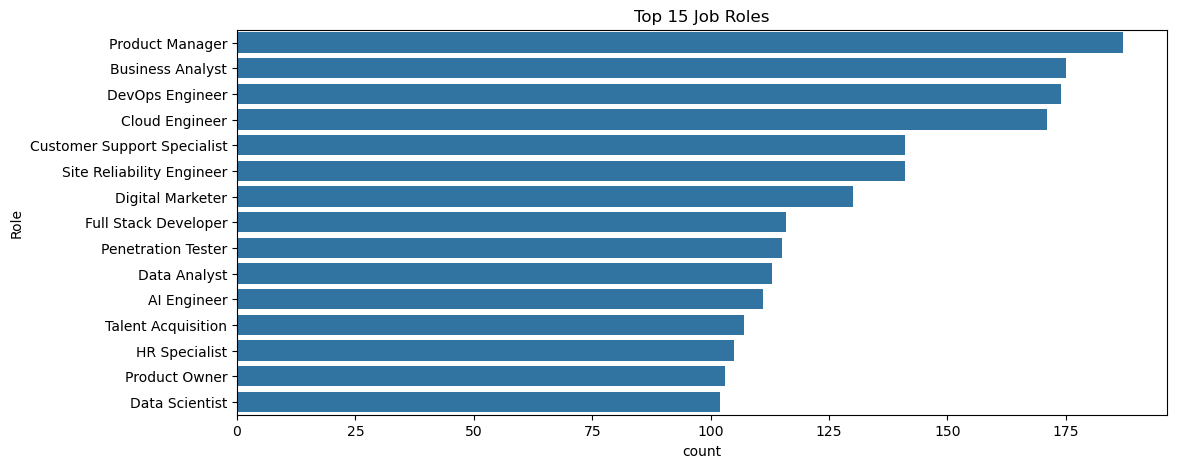

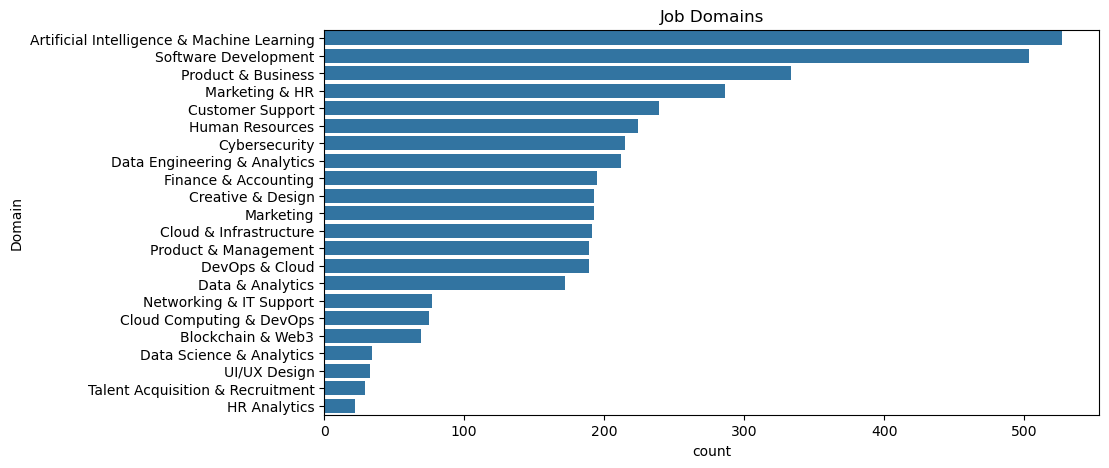


Role Classification Report:
                               precision    recall  f1-score   support

                  AI Engineer       1.00      1.00      1.00        23
                AI Researcher       1.00      1.00      1.00        21
                   Accountant       1.00      1.00      1.00        10
           Analytics Engineer       1.00      1.00      1.00        14
                      Auditor       1.00      0.88      0.93        16
                 BI Developer       1.00      1.00      1.00        16
            Backend Developer       1.00      1.00      1.00        16
         Blockchain Developer       1.00      1.00      1.00        11
             Business Analyst       1.00      1.00      1.00        28
              Cloud Architect       1.00      1.00      1.00        10
               Cloud Engineer       1.00      1.00      1.00        41
  Customer Support Specialist       1.00      1.00      1.00        32
                  DL Engineer       1.00      1

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("improved_skills_dataset.csv")

# Convert skills from string to list
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: ' '.join(x))

# Basic EDA
print("Dataset Shape:", df.shape)
print("\nSample Data:")
print(df.head())

# Visualizing top roles and domains
plt.figure(figsize=(12, 5))
sns.countplot(y=df['Role'], order=df['Role'].value_counts().index[:15])
plt.title('Top 15 Job Roles')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Domain'], order=df['Domain'].value_counts().index)
plt.title('Job Domains')
plt.show()

# Encode Labels
le_role = LabelEncoder()
df['Role_encoded'] = le_role.fit_transform(df['Role'])

le_domain = LabelEncoder()
df['Domain_encoded'] = le_domain.fit_transform(df['Domain'])

# Vectorize skills
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Skills'])

# Target for multi-output: both Role and Domain
y_role = df['Role_encoded']
y_domain = df['Domain_encoded']

# Split data
X_train, X_test, y_role_train, y_role_test, y_domain_train, y_domain_test = train_test_split(
    X, y_role, y_domain, test_size=0.2, random_state=42)

# Train models
role_model = RandomForestClassifier(n_estimators=150, random_state=42)
role_model.fit(X_train, y_role_train)

domain_model = RandomForestClassifier(n_estimators=150, random_state=42)
domain_model.fit(X_train, y_domain_train)

# Evaluate
print("\nRole Classification Report:")
y_role_pred = role_model.predict(X_test)
print(classification_report(y_role_test, y_role_pred, target_names=le_role.classes_))

print("\nDomain Classification Report:")
y_domain_pred = domain_model.predict(X_test)
print(classification_report(y_domain_test, y_domain_pred, target_names=le_domain.classes_))

# Inference Function
def predict_role_domain(input_skills):
    input_processed = ' '.join(input_skills)
    vectorized = vectorizer.transform([input_processed])
    predicted_role = le_role.inverse_transform(role_model.predict(vectorized))[0]
    predicted_domain = le_domain.inverse_transform(domain_model.predict(vectorized))[0]
    return predicted_role, predicted_domain



In [31]:

# Example usage
example_skills = ["", "", "Teamwork", ""]

pred_role, pred_domain = predict_role_domain(example_skills)
print("\nPredicted Role:", pred_role)
print("Predicted Domain:", pred_domain)


Predicted Role: Accountant
Predicted Domain: Software Development


Dataset Shape: (3595, 3)

Sample Data:
                                       Domain            Role  \
0  Artificial Intelligence & Machine Learning   AI Researcher   
1  Artificial Intelligence & Machine Learning  Data Scientist   
2  Artificial Intelligence & Machine Learning     DL Engineer   
3  Artificial Intelligence & Machine Learning     AI Engineer   
4  Artificial Intelligence & Machine Learning     DL Engineer   

                                              Skills  
0  Statistics Reinforcement Learning NLP Mathemat...  
1  Numpy Python Pandas Machine Learning Mathemati...  
2           RNN TensorFlow CNN Deep Learning PyTorch  
3  Transformers Prompt Engineering Deep Learning ...  
4           Deep Learning PyTorch RNN CNN TensorFlow  


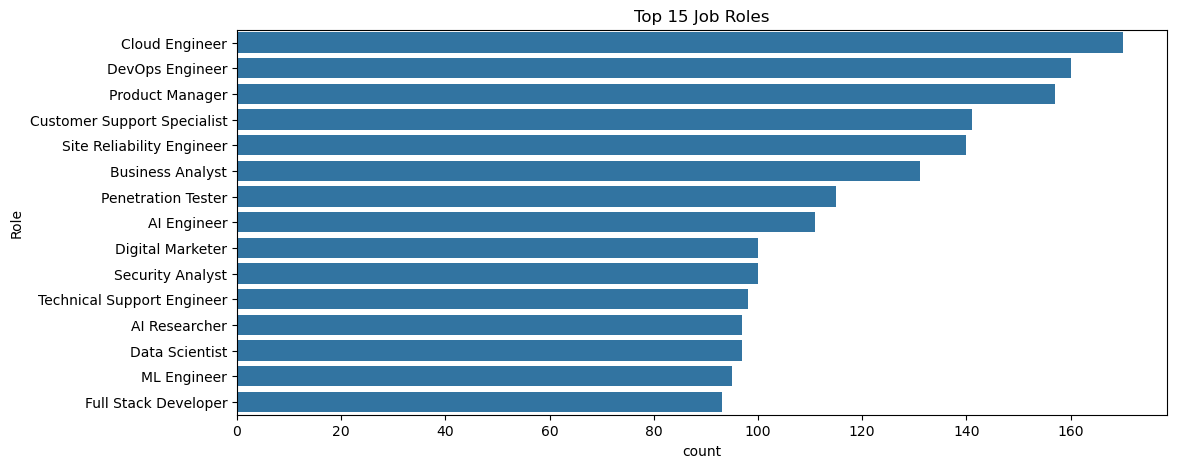

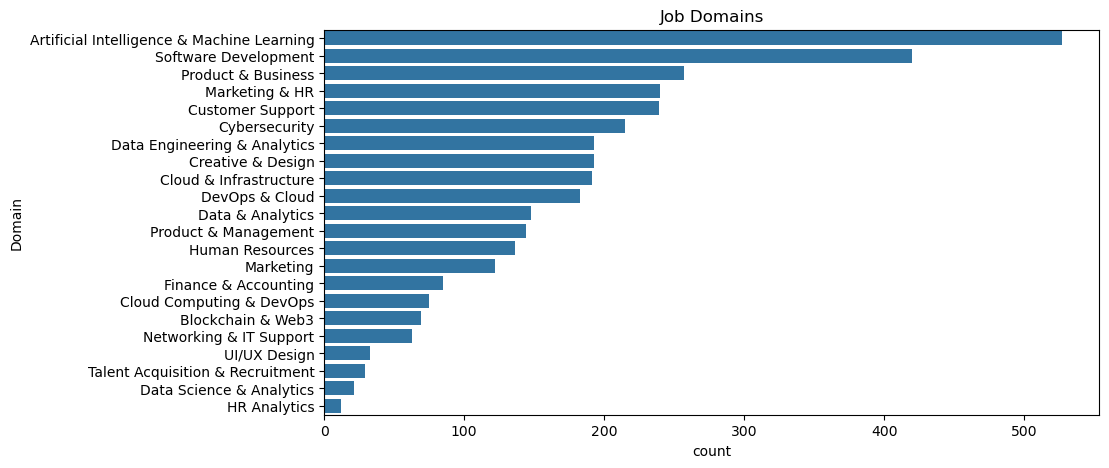


Classification Report (Role + Domain):
                                                               precision    recall  f1-score   support

    AI Engineer || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        31
  AI Researcher || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        22
                           Accountant || Finance & Accounting       1.00      1.00      1.00         4
           Analytics Engineer || Data Engineering & Analytics       1.00      1.00      1.00        11
                              Auditor || Finance & Accounting       1.00      1.00      1.00         4
                             BI Developer || Data & Analytics       0.90      1.00      0.95         9
                 BI Developer || Data Engineering & Analytics       1.00      1.00      1.00         9
                    Backend Developer || Software Development       1.00      0.93      0.96        14
                    Blockchain D

c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("final.csv")

# Convert skills from string to list
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: ' '.join(x))

# Basic EDA
print("Dataset Shape:", df.shape)
print("\nSample Data:")
print(df.head())

# Visualizing top roles and domains
plt.figure(figsize=(12, 5))
sns.countplot(y=df['Role'], order=df['Role'].value_counts().index[:15])
plt.title('Top 15 Job Roles')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Domain'], order=df['Domain'].value_counts().index)
plt.title('Job Domains')
plt.show()

# Combine Role and Domain for joint prediction
df['Combined_Label'] = df['Role'] + " || " + df['Domain']
le_combined = LabelEncoder()
df['Combined_encoded'] = le_combined.fit_transform(df['Combined_Label'])

# Vectorize skills
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Skills'])
y_combined = df['Combined_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_combined, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Evaluate
print("\nClassification Report (Role + Domain):")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_combined.classes_))

# Inference Function
def predict_role_domain(input_skills):
    input_processed = ' '.join(input_skills)
    vectorized = vectorizer.transform([input_processed])
    pred_encoded = model.predict(vectorized)[0]
    combined = le_combined.inverse_transform([pred_encoded])[0]
    role, domain = combined.split(" || ")
    return role, domain


In [77]:

# Example usage
example_skills = [ "MLOps", "Teamwork", "Communication"]
pred_role, pred_domain = predict_role_domain(example_skills)
print("\nPredicted Role:", pred_role)
print("Predicted Domain:", pred_domain)



Predicted Role: Technical Support Engineer
Predicted Domain: Customer Support


205 Duplicated Rows
Dataset Shape: (3595, 3)

Sample Data:
                                       Domain            Role  \
0  Artificial Intelligence & Machine Learning   AI Researcher   
1  Artificial Intelligence & Machine Learning  Data Scientist   
2  Artificial Intelligence & Machine Learning     DL Engineer   
3  Artificial Intelligence & Machine Learning     AI Engineer   
4  Artificial Intelligence & Machine Learning     DL Engineer   

                                              Skills  
0  statistics reinforcement learning natural lang...  
1  numpy python pandas machine learning mathemati...  
2     rnn tensorflow cnn deep learning deep learning  
3  transformers prompt engineering engineering de...  
4     deep learning deep learning rnn cnn tensorflow  


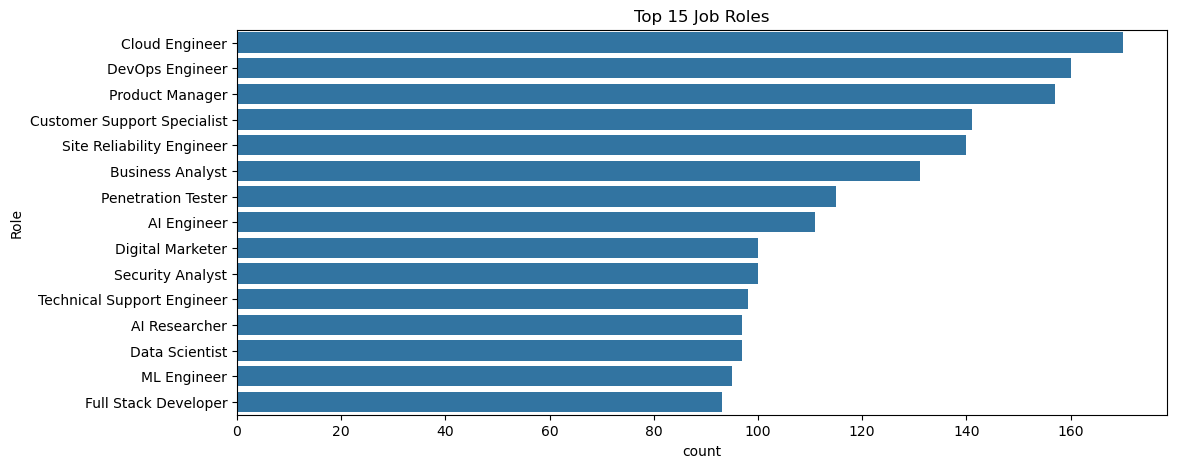

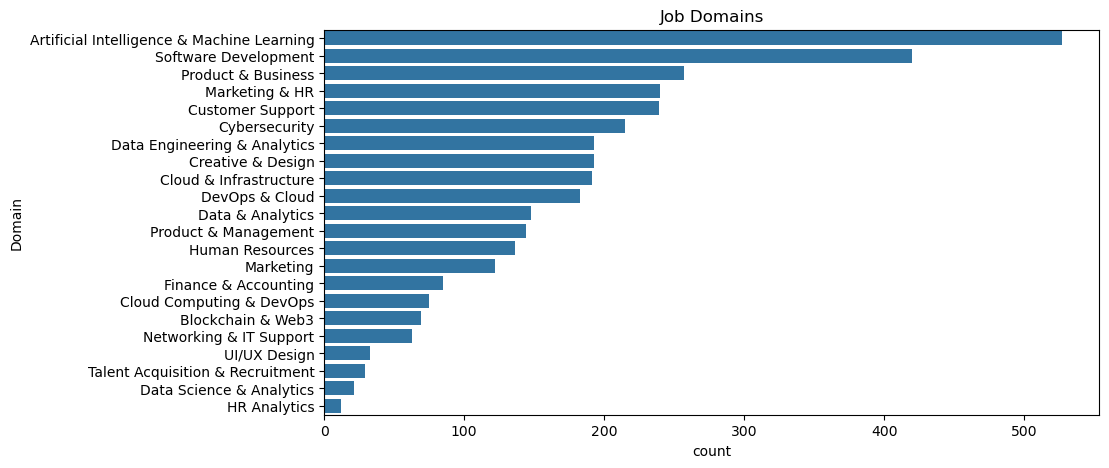


Classification Report (Role + Domain):
                                                               precision    recall  f1-score   support

    AI Engineer || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        31
  AI Researcher || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        22
                           Accountant || Finance & Accounting       1.00      1.00      1.00         4
           Analytics Engineer || Data Engineering & Analytics       1.00      1.00      1.00        11
                              Auditor || Finance & Accounting       1.00      1.00      1.00         4
                             BI Developer || Data & Analytics       0.90      1.00      0.95         9
                 BI Developer || Data Engineering & Analytics       1.00      1.00      1.00         9
                    Backend Developer || Software Development       1.00      1.00      1.00        14
                    Blockchain D

c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Skill normalization mapping
# ---------------------------
skill_mapping = {
    "ml": "machine learning",
    "dl": "deep learning",
    "ai": "artificial intelligence",
    "rest api": "rest api",
    "rest apis": "rest api",
    "restful api": "rest api",
    "restful": "rest api",
    "rest": "rest api",
    "springboot": "spring boot",
    "spring-boot": "spring boot",
    "apis": "api",
    "large language models": "llms",
    "large language model": "llms",
    "llm": "llms",
    "natural language understanding": "natural language processing",
    "natural language generation": "natural language processing",
    "nlp": "natural language processing",
    "Natural language processing": "natural language processing",
    "viz": "visualization",
    "data viz": "data visualization",
    "tensorflow 2.0": "tensorflow",
    "py": "python",
    "react": "react",
    "react js": "react",
    "react.js": "react",
    "js": "javascript",
    "c plus plus": "c++",
    "cpp": "c++",
    "csharp": "c#",
    "rdbms": "relational database",
    "sql server": "sql",
    "postgressql": "postgresql",
    "nosql db": "nosql",
    "xgboost": "gradient boosting",
    "gboost": "gradient boosting",
    "pytorch": "deep learning",
    "prompting": "prompt engineering",
    "prompt": "prompt engineering",
    "AI prompt": "prompt engineering",
    "AI prompting": "prompt engineering",
    "convolutional neural network": "cnn",
    "convolutional neural networks": "cnn",
    "convolutional neural net": "cnn",
    "convolutional neural nets": "cnn",
    "recurrent neural network": "rnn",
    "recurrent neural networks": "rnn",
    "recurrent neural net": "rnn",
    "recurrent neural nets": "rnn",
    "long short term memory": "lstm",
    "long short term memory networks": "lstm",
    "long short term memory net": "lstm",
    "Genarative adversarial networks": "gans",
    "Generative adversarial network": "gans",
    "ML pipeline": "ml pipelines",
    "MLpipeline": "ml pipelines",
    "MLOps": "ml ops",
    "stats":"Statistics",
    "stat":"Statistics",
    "maths":"Mathematics",
    "math":"Mathematics",
    "algorithm" : "algorithms",
    "Data structures" : "Data structures",
    "Data structure" : "Data structures",
    "DSA": "DSA",
    "System designing":"system design",
    "System design":"system design",
    "Oops":"OOP",
    "Object oriented programming":"OOP",
    "Object oriented programming language":"OOP",
}

def normalize_skills(skill_string):
    tokens = re.findall(r'\b[\w\-\+#.]+\b', skill_string.lower())
    normalized_tokens = []
    for token in tokens:
        token = token.replace('_', ' ')
        normalized = skill_mapping.get(token, token)
        normalized_tokens.append(normalized)
    return ' '.join(normalized_tokens)

# ---------------------------
# Load dataset
# ---------------------------
df = pd.read_csv("final.csv")
print(df.duplicated().sum(),"Duplicated Rows")


# Convert and normalize skills
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: normalize_skills(' '.join(x)))

# ---------------------------
# Basic EDA
# ---------------------------
print("Dataset Shape:", df.shape)
print("\nSample Data:")
print(df.head())

plt.figure(figsize=(12, 5))
sns.countplot(y=df['Role'], order=df['Role'].value_counts().index[:15])
plt.title('Top 15 Job Roles')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Domain'], order=df['Domain'].value_counts().index)
plt.title('Job Domains')
plt.show()

# ---------------------------
# Prepare combined label
# ---------------------------
df['Combined_Label'] = df['Role'] + " || " + df['Domain']
le_combined = LabelEncoder()
df['Combined_encoded'] = le_combined.fit_transform(df['Combined_Label'])

# ---------------------------
# TF-IDF and train/test split
# ---------------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Skills'])
y_combined = df['Combined_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_combined, test_size=0.2, random_state=42
)

# ---------------------------
# Train model
# ---------------------------
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# Evaluate model
# ---------------------------
print("\nClassification Report (Role + Domain):")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_combined.classes_))

# ---------------------------
# Inference Function with Skill Match Check
# ---------------------------
def predict_role_domain(input_skills, min_match=2):
    input_processed = normalize_skills(' '.join(input_skills))
    input_tokens = set(input_processed.split())
    vocab_set = set(vectorizer.vocabulary_.keys())
    matched_skills = input_tokens.intersection(vocab_set)

    if len(matched_skills) < min_match:
        return "Insufficient skill match", "Insufficient skill match"

    vectorized = vectorizer.transform([input_processed])
    pred_encoded = model.predict(vectorized)[0]
    combined = le_combined.inverse_transform([pred_encoded])[0]
    role, domain = combined.split(" || ")
    return role, domain

def show_top_matches(input_skills, top_n=5):
    input_processed = normalize_skills(' '.join(input_skills))
    vectorized = vectorizer.transform([input_processed])
    probs = model.predict_proba(vectorized)[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    for i in top_indices:
        print(f"{le_combined.inverse_transform([i])[0]} --> {probs[i]:.3f}")



In [30]:
# ---------------------------
# Example prediction
# ---------------------------
example_skills = ['HTML', 'CSS', 'React', 'teamwork']
role, domain = predict_role_domain(example_skills)
print("\nPredicted Role:", role)
print("Predicted Domain:", domain)

show_top_matches(example_skills)



Predicted Role: Frontend Developer
Predicted Domain: Software Development
Frontend Developer || Software Development --> 0.753
Full Stack Developer || Software Development --> 0.093
Mobile App Developer || Software Development --> 0.027
Backend Developer || Software Development --> 0.013
Digital Marketer || Marketing & HR --> 0.013


205 Duplicated Rows Found
Dataset Shape: (3390, 3)

Sample Data:
                                        Domain            Role  \
0  Artificial Intelligence & Machine Learning   AI Researcher   
1  Artificial Intelligence & Machine Learning  Data Scientist   
2  Artificial Intelligence & Machine Learning     DL Engineer   
3  Artificial Intelligence & Machine Learning     AI Engineer   
4  Artificial Intelligence & Machine Learning     DL Engineer   

                                              Skills  
0  statistics reinforcement learning natural lang...  
1  numpy python pandas machine learning mathemati...  
2     rnn tensorflow cnn deep learning deep learning  
3  transformers prompt engineering engineering de...  
4     deep learning deep learning rnn cnn tensorflow  


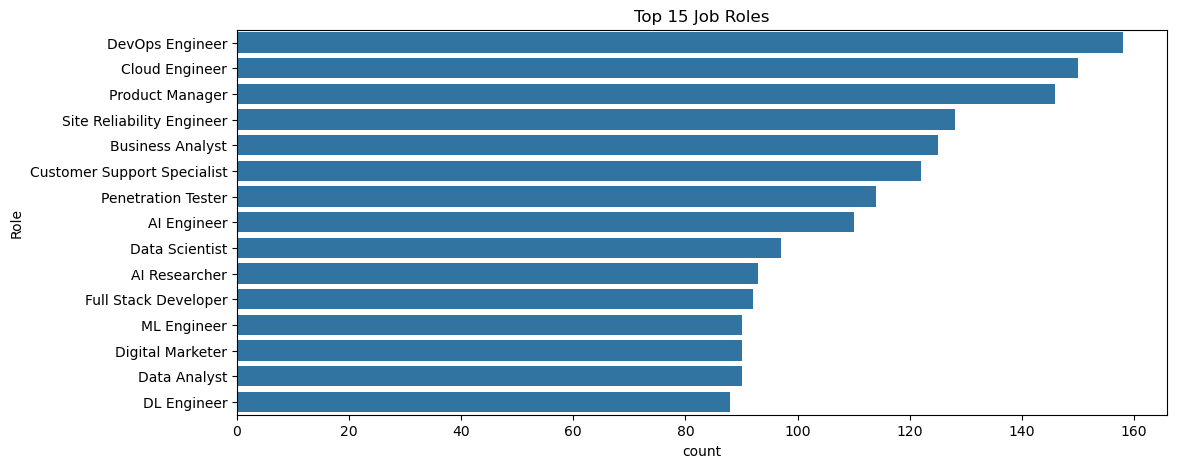

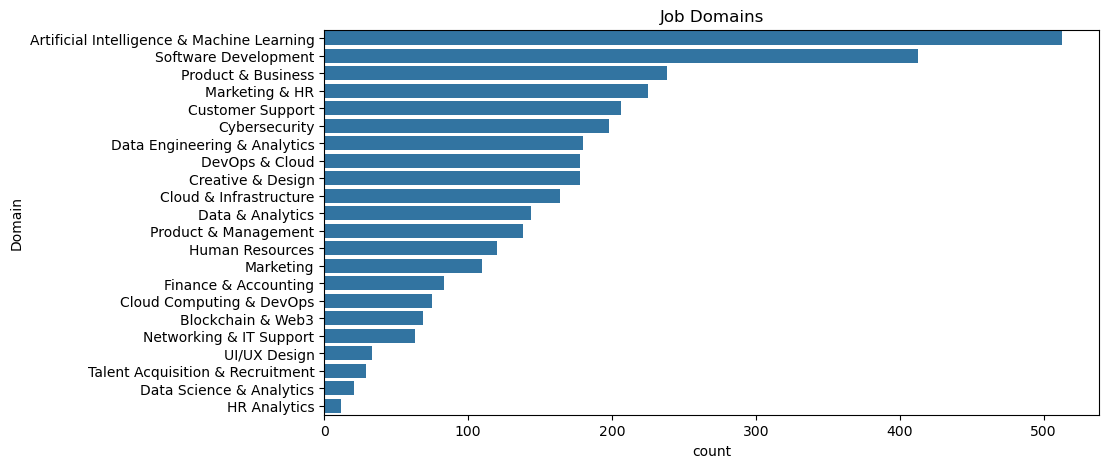


Classification Report (Role + Domain):
                                                               precision    recall  f1-score   support

    AI Engineer || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        29
  AI Researcher || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        18
                           Accountant || Finance & Accounting       1.00      1.00      1.00         4
           Analytics Engineer || Data Engineering & Analytics       1.00      1.00      1.00        12
                              Auditor || Finance & Accounting       1.00      1.00      1.00         8
                             BI Developer || Data & Analytics       0.92      1.00      0.96        12
                 BI Developer || Data Engineering & Analytics       1.00      1.00      1.00         8
                    Backend Developer || Software Development       1.00      1.00      1.00        17
                    Blockchain D

In [45]:
# ---------------------- IMPORTS ----------------------
import pandas as pd
import numpy as np
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------- SKILL NORMALIZATION ----------------------
skill_mapping = {
    "ml": "machine learning", "dl": "deep learning", "ai": "artificial intelligence",
    "rest api": "rest api", "rest apis": "rest api", "restful api": "rest api",
    "restful": "rest api", "rest": "rest api", "springboot": "spring boot",
    "spring-boot": "spring boot", "apis": "api", "large language models": "llms",
    "large language model": "llms", "llm": "llms", "natural language understanding": "natural language processing",
    "natural language generation": "natural language processing", "nlp": "natural language processing",
    "Natural language processing": "natural language processing", "viz": "visualization",
    "data viz": "data visualization", "tensorflow 2.0": "tensorflow", "py": "python",
    "react": "react", "react js": "react", "react.js": "react", "js": "javascript",
    "c plus plus": "c++", "cpp": "c++", "csharp": "c#", "rdbms": "relational database",
    "sql server": "sql", "postgressql": "postgresql", "nosql db": "nosql",
    "xgboost": "gradient boosting", "gboost": "gradient boosting", "pytorch": "deep learning",
    "prompting": "prompt engineering", "prompt": "prompt engineering", "AI prompt": "prompt engineering",
    "AI prompting": "prompt engineering", "convolutional neural network": "cnn",
    "convolutional neural networks": "cnn", "convolutional neural net": "cnn",
    "convolutional neural nets": "cnn", "recurrent neural network": "rnn",
    "recurrent neural networks": "rnn", "recurrent neural net": "rnn",
    "recurrent neural nets": "rnn", "long short term memory": "lstm",
    "long short term memory networks": "lstm", "long short term memory net": "lstm",
    "Genarative adversarial networks": "gans", "Generative adversarial network": "gans",
    "ML pipeline": "ml pipelines", "MLpipeline": "ml pipelines", "MLOps": "ml ops",
    "stats": "Statistics", "stat": "Statistics", "maths": "Mathematics", "math": "Mathematics",
    "algorithm": "algorithms", "Data structures": "Data structures", "Data structure": "Data structures",
    "DSA": "DSA", "System designing": "system design", "System design": "system design",
    "Oops": "OOP", "Object oriented programming": "OOP", "Object oriented programming language": "OOP"
}

def normalize_skills(skill_string):
    tokens = re.findall(r'\b[\w\-\+#.]+\b', skill_string.lower())
    normalized_tokens = []
    for token in tokens:
        token = token.replace('_', ' ')
        normalized = skill_mapping.get(token, token)
        normalized_tokens.append(normalized)
    return ' '.join(normalized_tokens)

# ---------------------- LOAD DATA ----------------------
df = pd.read_csv("final.csv")
print(df.duplicated().sum(), "Duplicated Rows Found")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert and normalize skills
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: normalize_skills(' '.join(x)))

# ---------------------- EDA (Optional) ----------------------
print("Dataset Shape:", df.shape)
print("\nSample Data:\n", df.head())

plt.figure(figsize=(12, 5))
sns.countplot(y=df['Role'], order=df['Role'].value_counts().index[:15])
plt.title('Top 15 Job Roles')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Domain'], order=df['Domain'].value_counts().index)
plt.title('Job Domains')
plt.show()

# ---------------------- LABEL ENCODING ----------------------
df['Combined_Label'] = df['Role'] + " || " + df['Domain']
le_combined = LabelEncoder()
df['Combined_encoded'] = le_combined.fit_transform(df['Combined_Label'])

# ---------------------- VECTORIZATION ----------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Skills'])
y_combined = df['Combined_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_combined, test_size=0.2, random_state=42
)

# ---------------------- MODEL TRAINING ----------------------
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ---------------------- EVALUATION ----------------------
print("\nClassification Report (Role + Domain):")
y_pred = model.predict(X_test)

# Fix: Only include labels present in y_test/y_pred
labels_in_test = unique_labels(y_test, y_pred)
target_names = le_combined.inverse_transform(labels_in_test)

print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names))

# ---------------------- INFERENCE FUNCTIONS ----------------------
def predict_role_domain(input_skills, min_match=2):
    input_processed = normalize_skills(' '.join(input_skills))
    input_tokens = set(input_processed.split())
    vocab_set = set(vectorizer.vocabulary_.keys())
    matched_skills = input_tokens.intersection(vocab_set)

    if len(matched_skills) < min_match:
        return "Insufficient skill match", "Insufficient skill match"

    vectorized = vectorizer.transform([input_processed])
    pred_encoded = model.predict(vectorized)[0]
    combined = le_combined.inverse_transform([pred_encoded])[0]
    role, domain = combined.split(" || ")
    return role, domain

def show_top_matches(input_skills, top_n=5):
    input_processed = normalize_skills(' '.join(input_skills))
    vectorized = vectorizer.transform([input_processed])
    probs = model.predict_proba(vectorized)[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    print("\nTop Matching Roles + Domains:")
    for i in top_indices:
        print(f"{le_combined.inverse_transform([i])[0]} --> {probs[i]:.3f}")



In [46]:
# ---------------------- SAMPLE TEST ----------------------
print("\n--- SAMPLE TEST ---")
sample_input = ['python', 'machine learning', 'pandas', 'numpy', 'teamwork']
role, domain = predict_role_domain(sample_input)
print("Predicted Role:", role)
print("Predicted Domain:", domain)

show_top_matches(sample_input)


--- SAMPLE TEST ---
Predicted Role: Data Scientist
Predicted Domain: Artificial Intelligence & Machine Learning

Top Matching Roles + Domains:
Data Scientist || Artificial Intelligence & Machine Learning --> 0.790
Data Scientist || Data & Analytics --> 0.170
ML Engineer || Artificial Intelligence & Machine Learning --> 0.020
AI Engineer || Artificial Intelligence & Machine Learning --> 0.020
UI Designer || UI/UX Design --> 0.000


In [48]:
import pandas as pd
import ast

# Load CSV and parse lists properly
df = pd.read_csv('final.csv')
df['Skills'] = df['Skills'].apply(lambda x: [skill.strip().lower() for skill in ast.literal_eval(x)])

# Normalize helper
def normalize_skills(skill_list):
    return set([skill.lower().strip() for skill in skill_list])

# Main function
def get_gap_skills(user_skills, predicted_role, predicted_domain):
    normalized_user_skills = normalize_skills(user_skills)

    matching_rows = df[
        (df['Role'].str.strip().str.lower() == predicted_role.lower()) &
        (df['Domain'].str.strip().str.lower() == predicted_domain.lower())
    ]

    if matching_rows.empty:
        return [], [], []

    required_skills = set()
    for skills in matching_rows['Skills']:
        required_skills.update(skills)

    gap_skills = sorted(required_skills - normalized_user_skills)

    return sorted(normalized_user_skills), sorted(required_skills), gap_skills

In [49]:
# Input
user_skills = ['Hris', 'CRM', 'communication', 'AI', 'teamwork']
predicted_role = 'HR specialist'
predicted_domain = 'Marketing & HR'

# Call function
your_skills, required_skills, gap_skills = get_gap_skills(user_skills, predicted_role, predicted_domain)

# Output
print(f"🎯 Predicted Role: {predicted_role}")
print(f"🎯 Predicted Domain: {predicted_domain}\n")
print(f"✅ Your Skills: {your_skills}")
print(f"📋 Required Skills: {required_skills}\n")
print(f"🛠 Gap Skills (to upskill): {gap_skills}")

🎯 Predicted Role: HR specialist
🎯 Predicted Domain: Marketing & HR

✅ Your Skills: ['ai', 'communication', 'crm', 'hris', 'teamwork']
📋 Required Skills: ['ats', 'compliance', 'conflict resolution', 'crm', 'employee engagement', 'hris', 'onboarding', 'payroll', 'recruitment', 'talent acquistion']

🛠 Gap Skills (to upskill): ['ats', 'compliance', 'conflict resolution', 'employee engagement', 'onboarding', 'payroll', 'recruitment', 'talent acquistion']


In [56]:
# Combined version of the code
# ---------------------- IMPORTS ----------------------
import pandas as pd
import numpy as np
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels

# ---------------------- SKILL NORMALIZATION ----------------------
skill_mapping = {
    "ml": "machine learning", "dl": "deep learning", "ai": "artificial intelligence",
    "rest api": "rest api", "rest apis": "rest api", "restful api": "rest api",
    "restful": "rest api", "rest": "rest api", "springboot": "spring boot",
    "spring-boot": "spring boot", "apis": "api", "large language models": "llms",
    "large language model": "llms", "llm": "llms", "natural language understanding": "natural language processing",
    "natural language generation": "natural language processing", "nlp": "natural language processing",
    "Natural language processing": "natural language processing", "viz": "visualization",
    "data viz": "data visualization", "tensorflow 2.0": "tensorflow", "py": "python",
    "react": "react", "react js": "react", "react.js": "react", "js": "javascript",
    "c plus plus": "c++", "cpp": "c++", "csharp": "c#", "rdbms": "relational database",
    "sql server": "sql", "postgressql": "postgresql", "nosql db": "nosql",
    "xgboost": "gradient boosting", "gboost": "gradient boosting", "pytorch": "deep learning",
    "prompting": "prompt engineering", "prompt": "prompt engineering", "AI prompt": "prompt engineering",
    "AI prompting": "prompt engineering", "convolutional neural network": "cnn",
    "convolutional neural networks": "cnn", "convolutional neural net": "cnn",
    "convolutional neural nets": "cnn", "recurrent neural network": "rnn",
    "recurrent neural networks": "rnn", "recurrent neural net": "rnn",
    "recurrent neural nets": "rnn", "long short term memory": "lstm",
    "long short term memory networks": "lstm", "long short term memory net": "lstm",
    "Genarative adversarial networks": "gans", "Generative adversarial network": "gans",
    "ML pipeline": "ml pipelines", "MLpipeline": "ml pipelines", "MLOps": "ml ops",
    "stats": "statistics", "stat": "statistics", "maths": "mathematics", "math": "mathematics",
    "algorithm": "algorithms", "Data structures": "data structures", "Data structure": "data structures",
    "DSA": "dsa", "System designing": "system design", "System design": "system design",
    "Oops": "oop", "Object oriented programming": "oop", "Object oriented programming language": "oop"
}

def normalize_skills(skill_string):
    skill_phrases = [s.strip() for s in skill_string.lower().split(',')]
    normalized_phrases = []
    for phrase in skill_phrases:
        normalized = skill_mapping.get(phrase, phrase)
        normalized_phrases.append(normalized)
    return ' '.join(normalized_phrases)


# ---------------------- LOAD DATA ----------------------
dataset_path = "final.csv"
df = pd.read_csv(dataset_path)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert skills column from string list to actual list and normalize
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: normalize_skills(' '.join(x)))

# ---------------------- LABEL ENCODING ----------------------
df['Combined_Label'] = df['Role'].str.strip() + " || " + df['Domain'].str.strip()
le_combined = LabelEncoder()
df['Combined_encoded'] = le_combined.fit_transform(df['Combined_Label'])

# ---------------------- VECTORIZATION ----------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Skills'])
y_combined = df['Combined_encoded']

# ---------------------- TRAIN-TEST SPLIT ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# ---------------------- MODEL TRAINING ----------------------
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ---------------------- EVALUATION ----------------------
y_pred = model.predict(X_test)
labels_in_test = unique_labels(y_test, y_pred)
target_names = le_combined.inverse_transform(labels_in_test)
print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names))

# ---------------------- INFERENCE & GAP SKILL ANALYSIS ----------------------

def normalize_skill_token(skill):
    skill = skill.lower().strip()
    return skill_mapping.get(skill, skill)

def normalize_skill_list(skill_list):
    normalized_skills = set()
    for skill in skill_list:
        normalized = skill_mapping.get(skill.lower().strip(), skill.lower().strip())
        normalized_skills.add(normalized)
    return normalized_skills


def predict_top_roles_domains(user_skills, top_n=5):
    # Prepare input skill string
    normalized_input_skills = ' '.join(user_skills).lower()
    normalized_input_skills = normalize_skills(normalized_input_skills)  # same normalization used during training
    input_vector = vectorizer.transform([normalized_input_skills])
    
    # Predict probabilities
    probs = model.predict_proba(input_vector)[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    
    predictions = []
    for idx in top_indices:
        combined_label = le_combined.inverse_transform([idx])[0]
        role, domain = combined_label.split(" || ")
        predictions.append((role, domain, probs[idx]))
    return predictions

def get_gap_skills(user_skills, role, domain):
    # Normalize user skills tokens
    user_tokens = normalize_skill_list(user_skills)

    # Filter dataset rows for role+domain
    filtered = df[(df['Role'].str.lower() == role.lower()) & (df['Domain'].str.lower() == domain.lower())]

    if filtered.empty:
        return user_tokens, set(), set()

    # Combine all required skills tokens from filtered rows
    required_tokens = set()
    for skills_str in filtered['Skills']:
        required_tokens.update(skills_str.split())

    gap_tokens = required_tokens - user_tokens

    return user_tokens, required_tokens, gap_tokens

def analyze_gap_for_top_n(user_skills, predictions, top_n=3):
    for i, (role, domain, score) in enumerate(predictions[:top_n], start=1):
        user, required, gap = get_gap_skills(user_skills, role, domain)
        print(f"Rank {i}: Role = {role} | Domain = {domain} | Confidence = {score:.3f}")
        print(f"Your Skills ({len(user)}): {sorted(user)}")
        print(f"Required Skills ({len(required)}): {sorted(required)}")
        print(f"Gap Skills ({len(gap)}): {sorted(gap)}")
        print("-" * 50)

# Example user skills input
user_skills = ['Python', 'Artficial Intelligence', 'Data Science', 'natural language processing', 'Pandas']  # you can replace with your actual input list

top_5 = predict_top_roles_domains(user_skills, top_n=5)

print("Top 5 predicted Role + Domain with confidence scores:")
for i, (role, domain, score) in enumerate(top_5, start=1):
    print(f"{i}. {role} || {domain} --> Score: {score:.3f}")

print("\nGap Skill Analysis for top 3 predictions:\n")
analyze_gap_for_top_n(user_skills, top_5, top_n=3)

                                                               precision    recall  f1-score   support

    AI Engineer || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        29
  AI Researcher || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        18
                           Accountant || Finance & Accounting       1.00      1.00      1.00         4
           Analytics Engineer || Data Engineering & Analytics       1.00      1.00      1.00        12
                              Auditor || Finance & Accounting       1.00      1.00      1.00         8
                             BI Developer || Data & Analytics       0.92      1.00      0.96        12
                 BI Developer || Data Engineering & Analytics       1.00      1.00      1.00         8
                    Backend Developer || Software Development       1.00      1.00      1.00        17
                    Blockchain Developer || Blockchain & Web3       1.00

In [54]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(le_combined, "label_encoder.pkl")

print("✅ Model, vectorizer, and label encoder saved.")


✅ Model, vectorizer, and label encoder saved.


In [68]:
# ---------------------- IMPORTS ----------------------
import pandas as pd
import numpy as np
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels

# ---------------------- SKILL NORMALIZATION ----------------------
skill_mapping = {
    "ml": "machine learning", "dl": "deep learning", "ai": "artificial intelligence",
    "rest api": "rest api", "rest apis": "rest api", "restful api": "rest api",
    "restful": "rest api", "rest": "rest api", "springboot": "spring boot",
    "spring-boot": "spring boot", "apis": "api", "large language models": "llms",
    "large language model": "llms", "llm": "llms", "natural language understanding": "natural language processing",
    "natural language generation": "natural language processing", "nlp": "natural language processing",
    "Natural language processing": "natural language processing", "viz": "visualization",
    "data viz": "data visualization", "tensorflow 2.0": "tensorflow", "py": "python",
    "react": "react", "react js": "react", "react.js": "react", "js": "javascript",
    "c plus plus": "c++", "cpp": "c++", "csharp": "c#", "rdbms": "relational database",
    "sql server": "sql", "postgressql": "postgresql", "nosql db": "nosql",
    "xgboost": "gradient boosting", "gboost": "gradient boosting", "pytorch": "deep learning",
    "prompting": "prompt engineering", "prompt": "prompt engineering", "AI prompt": "prompt engineering",
    "AI prompting": "prompt engineering", "convolutional neural network": "cnn",
    "convolutional neural networks": "cnn", "convolutional neural net": "cnn",
    "convolutional neural nets": "cnn", "recurrent neural network": "rnn",
    "recurrent neural networks": "rnn", "recurrent neural net": "rnn",
    "recurrent neural nets": "rnn", "long short term memory": "lstm",
    "long short term memory networks": "lstm", "long short term memory net": "lstm",
    "Genarative adversarial networks": "gans", "Generative adversarial network": "gans",
    "ML pipeline": "ml pipelines", "MLpipeline": "ml pipelines", "MLOps": "ml ops",
    "stats": "statistics", "stat": "statistics", "maths": "mathematics", "math": "mathematics",
    "algorithm": "algorithms", "Data structures": "data structures", "Data structure": "data structures",
    "DSA": "dsa", "System designing": "system design", "System design": "system design",
    "Oops": "oop", "Object oriented programming": "oop", "Object oriented programming language": "oop"
}

def normalize_skills(skill_string):
    """Normalize a comma-separated string of skill phrases (multi-word skills preserved)."""
    skill_phrases = [s.strip().lower() for s in skill_string.split(',')]
    normalized_phrases = []
    for phrase in skill_phrases:
        normalized = skill_mapping.get(phrase, phrase)
        normalized_phrases.append(normalized)
    return ', '.join(normalized_phrases)  # <- return as comma-separated string to preserve phrases


# ---------------------- LOAD DATA ----------------------
dataset_path = "final.csv"
df = pd.read_csv(dataset_path)

df.drop_duplicates(inplace=True)

# Convert skill strings to normalized comma-separated phrases
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: normalize_skills(', '.join(x)))  # comma-separated phrases

# ---------------------- LABEL ENCODING ----------------------
df['Combined_Label'] = df['Role'].str.strip() + " || " + df['Domain'].str.strip()
le_combined = LabelEncoder()
df['Combined_encoded'] = le_combined.fit_transform(df['Combined_Label'])

# ---------------------- VECTORIZATION ----------------------

from tokenizer import comma_tokenizer
vectorizer = TfidfVectorizer(tokenizer=comma_tokenizer)
 # <- preserve multi-word phrases
X = vectorizer.fit_transform(df['Skills'])
y_combined = df['Combined_encoded']

# ---------------------- TRAIN-TEST SPLIT ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# ---------------------- MODEL TRAINING ----------------------
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ---------------------- EVALUATION ----------------------
y_pred = model.predict(X_test)
labels_in_test = unique_labels(y_test, y_pred)
target_names = le_combined.inverse_transform(labels_in_test)
print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names))


# ---------------------- INFERENCE & GAP SKILL ANALYSIS ----------------------

def normalize_skill_list(skill_list):
    normalized_skills = set()
    for skill in skill_list:
        normalized = skill_mapping.get(skill.lower().strip(), skill.lower().strip())
        normalized_skills.add(normalized)
    return normalized_skills


def predict_top_roles_domains(user_skills, top_n=5):
    normalized_input_skills = normalize_skills(', '.join(user_skills))  # comma-separated normalization
    input_vector = vectorizer.transform([normalized_input_skills])
    
    probs = model.predict_proba(input_vector)[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    
    predictions = []
    for idx in top_indices:
        combined_label = le_combined.inverse_transform([idx])[0]
        role, domain = combined_label.split(" || ")
        predictions.append((role, domain, probs[idx]))
    return predictions


def get_gap_skills(user_skills, role, domain):
    user_tokens = normalize_skill_list(user_skills)

    filtered = df[(df['Role'].str.lower() == role.lower()) & (df['Domain'].str.lower() == domain.lower())]

    if filtered.empty:
        return user_tokens, set(), set()

    required_tokens = set()
    for skills_str in filtered['Skills']:
        required_tokens.update([s.strip() for s in skills_str.split(',')])  # use phrases not individual words

    gap_tokens = required_tokens - user_tokens
    return user_tokens, required_tokens, gap_tokens


def analyze_gap_for_top_n(user_skills, predictions, top_n=3):
    for i, (role, domain, score) in enumerate(predictions[:top_n], start=1):
        user, required, gap = get_gap_skills(user_skills, role, domain)
        print(f"Rank {i}: Role = {role} | Domain = {domain} | Confidence = {score:.3f}")
        print(f"Your Skills ({len(user)}): {sorted(user)}")
        print(f"Required Skills ({len(required)}): {sorted(required)}")
        print(f"Gap Skills ({len(gap)}): {sorted(gap)}")
        print("-" * 50)


# ---------------------- EXAMPLE ----------------------
user_skills = ['Generative AI', 'Artficial Intelligence', 'Data Science', 'Prompt Engineering', 'Python']
top_5 = predict_top_roles_domains(user_skills, top_n=5)

print("Top 5 predicted Role + Domain with confidence scores:")
for i, (role, domain, score) in enumerate(top_5, start=1):
    print(f"{i}. {role} || {domain} --> Score: {score:.3f}")

print("\nGap Skill Analysis for top 3 predictions:\n")
analyze_gap_for_top_n(user_skills, top_5, top_n=3)


c:\Users\moham\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


                                                               precision    recall  f1-score   support

    AI Engineer || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        29
  AI Researcher || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        18
                           Accountant || Finance & Accounting       1.00      1.00      1.00         4
           Analytics Engineer || Data Engineering & Analytics       1.00      1.00      1.00        12
                              Auditor || Finance & Accounting       1.00      1.00      1.00         8
                             BI Developer || Data & Analytics       0.86      1.00      0.92        12
                 BI Developer || Data Engineering & Analytics       1.00      0.88      0.93         8
                    Backend Developer || Software Development       1.00      1.00      1.00        17
                    Blockchain Developer || Blockchain & Web3       1.00

In [67]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(le_combined, "label_encoder.pkl")

print("✅ Model, vectorizer, and label encoder saved.")

✅ Model, vectorizer, and label encoder saved.
